In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Check for successful imports
print("Libraries imported successfully.")


Libraries imported successfully.


In [4]:
# Load the dataset (replace with your dataset path)
data = pd.read_csv('advertising (1).csv' )

# Check the first few rows of the dataset
print(data.head())

# Define independent variables (features) and dependent variable (target)
X = data[['TV', 'Radio']]  # Removed Newspaper
y = data['Sales']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for successful split
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Training set size: (160, 2)
Testing set size: (40, 2)


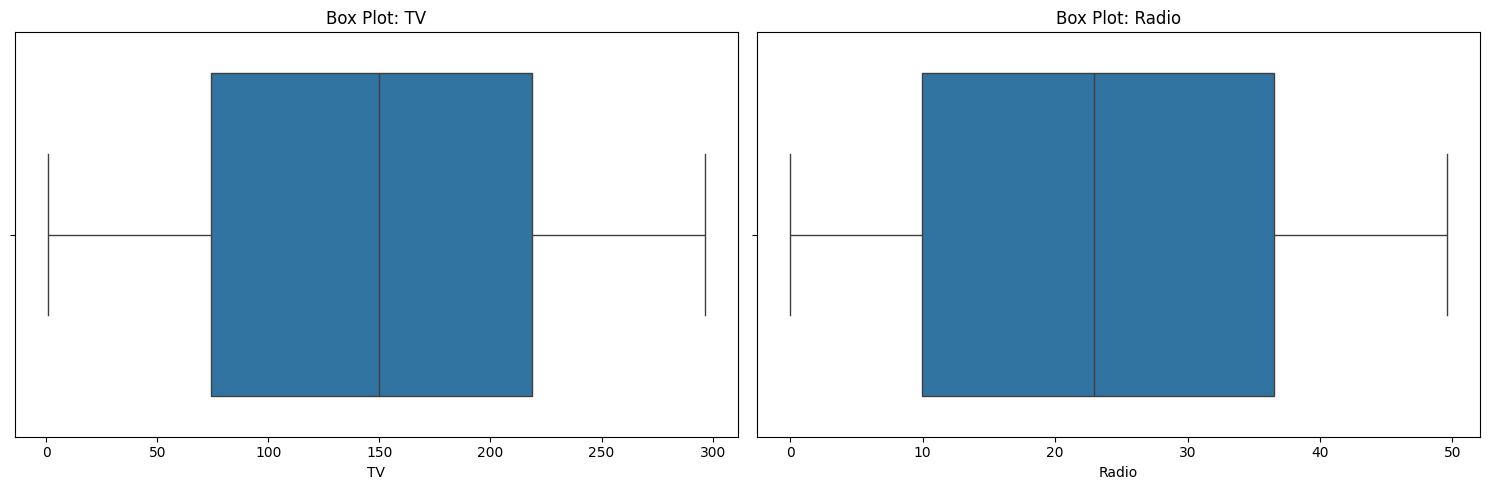

In [5]:
# Box plots to check for outliers
plt.figure(figsize=(15, 5))
for i, column in enumerate(X.columns):  # Only TV and Radio
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=X[column])
    plt.title(f"Box Plot: {column}")
plt.tight_layout()
plt.show()


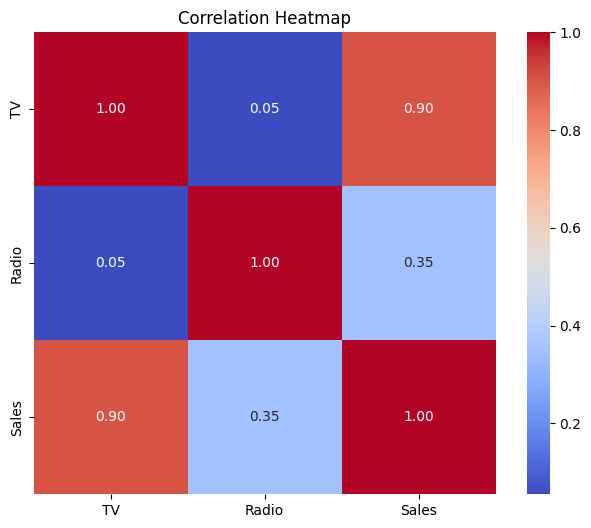

In [6]:
# Correlation heatmap
correlation_matrix = data[['TV', 'Radio', 'Sales']].corr()  # Include Sales for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap")
plt.show()


In [7]:
# Transform the features into polynomial features of degree 2
poly = PolynomialFeatures(degree=2)

# Fit and transform the training set features
X_poly_train = poly.fit_transform(X_train)

# Transform the testing set features
X_poly_test = poly.transform(X_test)

# Initialize and train the polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Model trained successfully
print("Polynomial regression model trained.")


Polynomial regression model trained.


In [8]:
# Make predictions using the polynomial model
y_pred = model.predict(X_poly_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")



Model Evaluation:
Mean Squared Error (MSE): 1.41
R-squared (R²): 0.95


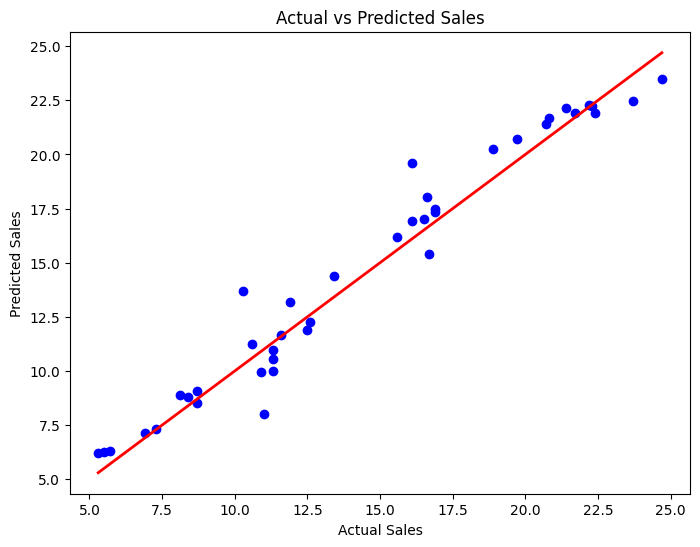

In [9]:
# Scatter plot for actual vs predicted sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


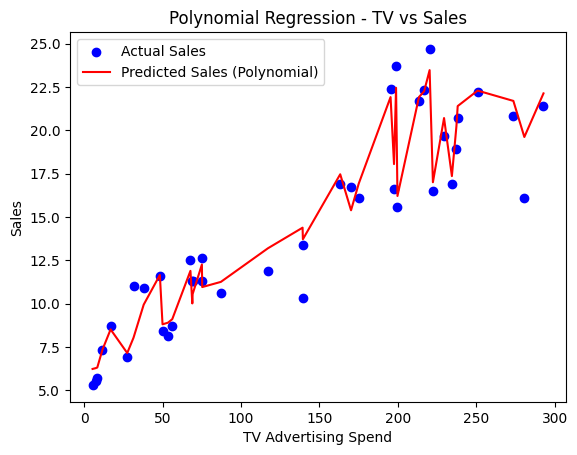

In [10]:
# Plot actual vs predicted sales for the feature 'TV'
sorted_indices = np.argsort(X_test['TV'])
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.scatter(X_test['TV'], y_test, color='blue', label='Actual Sales')
plt.plot(X_test_sorted['TV'], y_pred_sorted, color='red', label='Predicted Sales (Polynomial)')
plt.title('Polynomial Regression - TV vs Sales')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.legend()
plt.show()


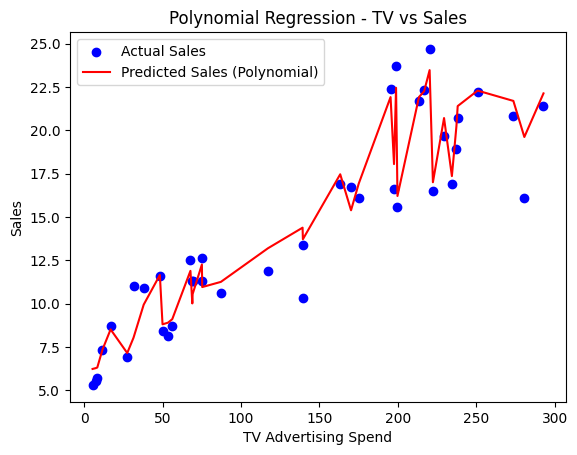

In [11]:
# Plot actual vs predicted sales for the feature 'TV'
sorted_indices = np.argsort(X_test['TV'])
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.scatter(X_test['TV'], y_test, color='blue', label='Actual Sales')
plt.plot(X_test_sorted['TV'], y_pred_sorted, color='red', label='Predicted Sales (Polynomial)')
plt.title('Polynomial Regression - TV vs Sales')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.legend()
plt.show()


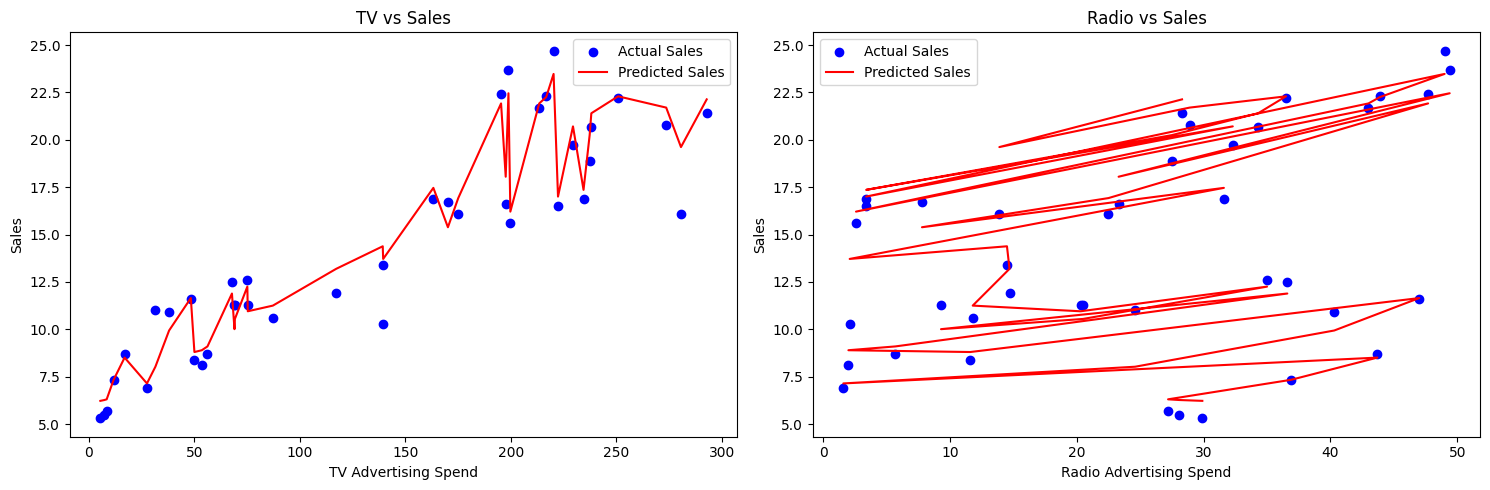

In [12]:
# Scatter plots for each feature vs sales
plt.figure(figsize=(15, 5))

# TV vs Sales
plt.subplot(1, 2, 1)
plt.scatter(X_test['TV'], y_test, color='blue', label='Actual Sales')
plt.plot(X_test_sorted['TV'], y_pred_sorted, color='red', label='Predicted Sales')
plt.title('TV vs Sales')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.legend()

# Radio vs Sales
plt.subplot(1, 2, 2)
plt.scatter(X_test['Radio'], y_test, color='blue', label='Actual Sales')
plt.plot(X_test_sorted['Radio'], y_pred_sorted, color='red', label='Predicted Sales')
plt.title('Radio vs Sales')
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Sales')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
# Train a Linear Regression Model (without polynomial features)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions using Linear Regression
y_pred_linear = linear_model.predict(X_test)

# Evaluate Linear Regression Model
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression R²: {r2_linear:.2f}")
print(f"Polynomial Regression R²: {r2:.2f}")


Linear Regression R²: 0.91
Polynomial Regression R²: 0.95
